<a href="https://colab.research.google.com/github/backendpapa/toyblob/blob/main/toyblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sklearn.datasets import make_blobs;
from keras.utils import to_categorical;
from keras.models import Sequential;
from keras.layers import Dense;
from matplotlib import pyplot;

In [12]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=2,cluster_std=2);

In [13]:
y=to_categorical(y)

In [14]:
n_train=800;
train_X,test_X=X[:n_train,:],X[n_train:,:]
train_y,test_y=y[:n_train],y[n_train:]
print(train_X.shape,test_X.shape)

(800, 2) (200, 2)


In [15]:
model=Sequential();
model.add(Dense(25,input_dim=2,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 78        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [17]:
history=model.fit(train_X,train_y,epochs=1000,verbose=1,validation_data=(test_X,test_y))

Epoch 1/1000
25/25 [==============================] - 1s 11ms/step - loss: 1.0114 - accuracy: 0.4419 - val_loss: 0.8505 - val_accuracy: 0.5800
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8691 - accuracy: 0.5378 - val_loss: 0.7451 - val_accuracy: 0.6700
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7627 - accuracy: 0.6483 - val_loss: 0.6956 - val_accuracy: 0.7250
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7423 - accuracy: 0.6395 - val_loss: 0.6573 - val_accuracy: 0.7350
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.6778 - val_loss: 0.6287 - val_accuracy: 0.7400
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6561 - val_loss: 0.6040 - val_accuracy: 0.7600
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.7002 - val_loss: 0.5807 - val_accuracy: 0.7600
Epoch

In [19]:
_,train_acc=model.evaluate(train_X,train_y);
_,test_acc=model.evaluate(test_X,test_y)
print('Train:',train_acc,'  Test:',test_acc);

7/7 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8350
Train: 0.8374999761581421   Test: 0.8349999785423279


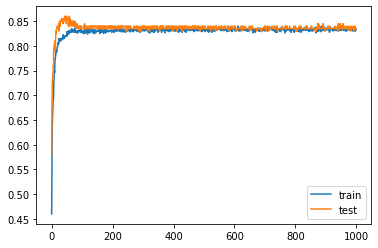

In [24]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend();
pyplot.show()